In [2]:
import numpy as np
import pandas as pd
import datetime
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.float_format","{:.3f}".format)

In [3]:
df = pd.read_csv("../input/train.csv")
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
cols_cat = df.select_dtypes(include=["object"]).columns.tolist()

for col in cols_cat:
    df[col] = df[col].astype(str)
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [159]:
cols = [col for col in df.columns if col not in ["id", "SalePrice"]]
kf = KFold(n_splits = 5,random_state = 2020)

In [160]:
param = {"objective":"regression",
         "learning_rate": 0.1,
         "metric": "rmse"
        }

In [161]:
param["feature_fraction"] = 1.0

feature_importance_df_10 = pd.DataFrame()

for seed in range(10):
    param["feature_fraction_seed"] = seed
    
    for fold, (idx_tr, idx_te) in enumerate(kf.split(df)):
    
        trn_data = lgb.Dataset(df.iloc[idx_tr][cols], label=df.iloc[idx_tr]["SalePrice"])
        val_data = lgb.Dataset(df.iloc[idx_te][cols], label=df.iloc[idx_te]["SalePrice"])

        num_round = 10000
        clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=-1, early_stopping_rounds = 100)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["Feature"] = cols
        fold_importance_df["importance"] = clf.feature_importance(importance_type = "gain")
        fold_importance_df["seed"] = seed
        fold_importance_df["fold"] = fold + 1
        feature_importance_df_10 = pd.concat([feature_importance_df_10, fold_importance_df], axis=0)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	training's rmse: 18812.4	valid_1's rmse: 23383.7
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	training's rmse: 19485.3	valid_1's rmse: 30757.9
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	training's rmse: 13318.5	valid_1's rmse: 29622.5
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	training's rmse: 16337.5	valid_1's rmse: 21742.7
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[10000]	training's rmse: 4.40433e-08	valid_1's rmse: 30792.3
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	training's rmse: 18812.4	valid_1's rmse: 23383.7
Training until validation scores don't improve for 100 rounds
Early stoppi

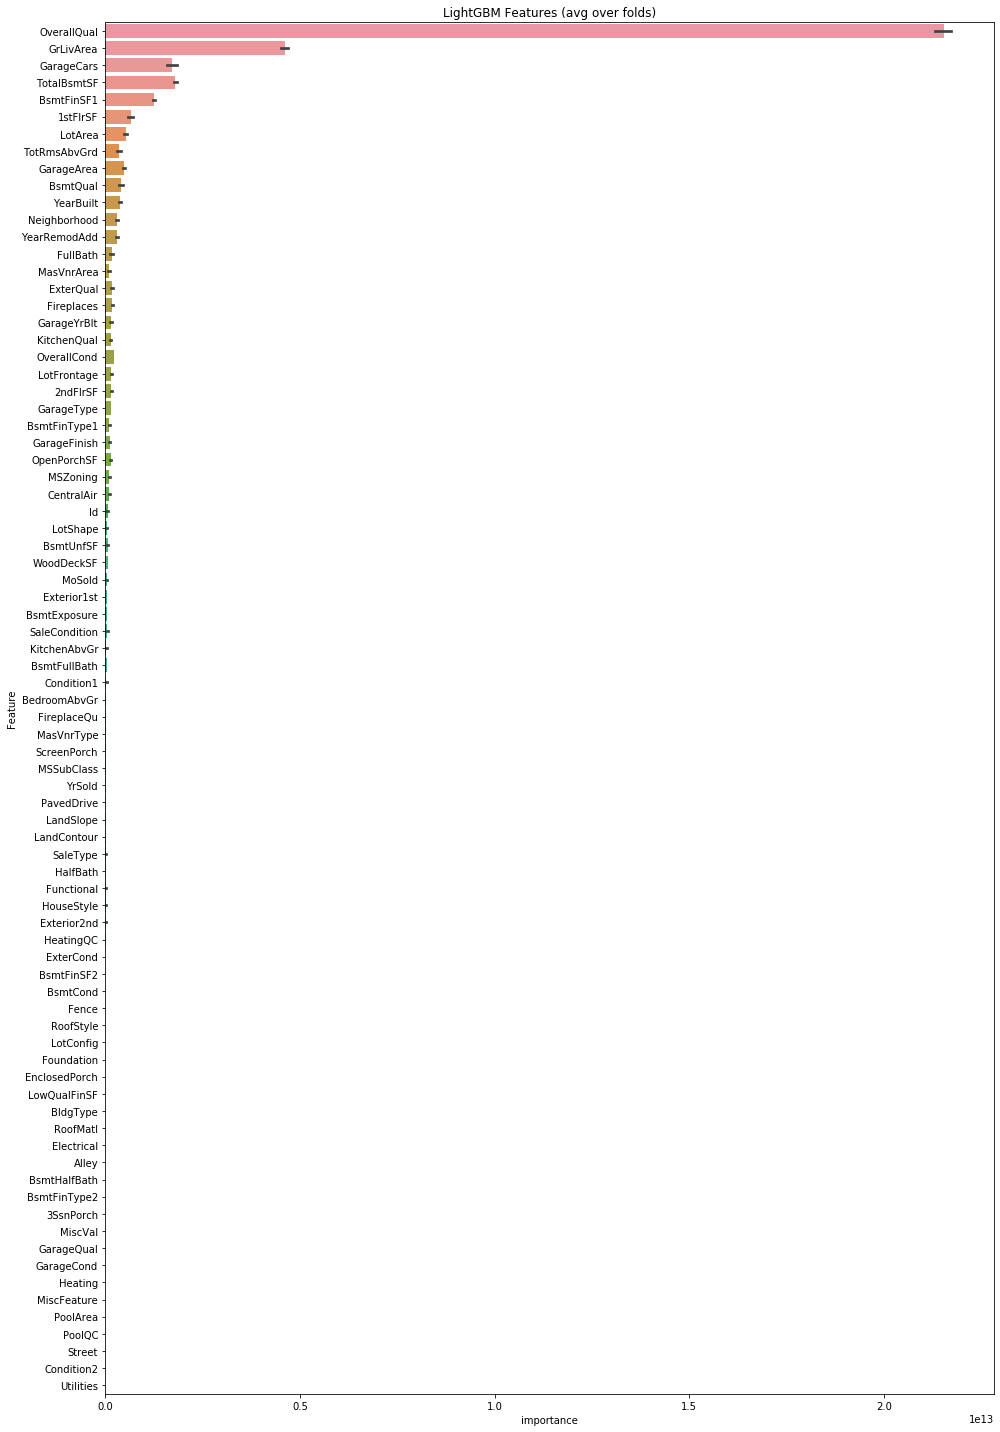

In [162]:
plt.figure(figsize=(14,20))
sns.barplot(x="importance",
            y="Feature",
            data=feature_importance_df_10.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [163]:
param["feature_fraction"] = 0.5

feature_importance_df_05 = pd.DataFrame()

for seed in range(10):
    param["feature_fraction_seed"] = seed
    
    for fold, (idx_tr, idx_te) in enumerate(kf.split(df)):
    
        trn_data = lgb.Dataset(df.iloc[idx_tr][cols], label=df.iloc[idx_tr]["SalePrice"])
        val_data = lgb.Dataset(df.iloc[idx_te][cols], label=df.iloc[idx_te]["SalePrice"])

        num_round = 10000
        clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=-1, early_stopping_rounds = 100)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["Feature"] = cols
        fold_importance_df["importance"] = clf.feature_importance(importance_type = "gain")
        fold_importance_df["seed"] = seed
        fold_importance_df["fold"] = fold + 1
        feature_importance_df_05 = pd.concat([feature_importance_df_05, fold_importance_df], axis=0)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	training's rmse: 16609.1	valid_1's rmse: 23005.3
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[26]	training's rmse: 21801.5	valid_1's rmse: 31640.9
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[572]	training's rmse: 1433.05	valid_1's rmse: 29073.1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	training's rmse: 16571.8	valid_1's rmse: 22149.4
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[10000]	training's rmse: 6.28835e-09	valid_1's rmse: 29096.8
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	training's rmse: 18020.3	valid_1's rmse: 22616.3
Training until validation scores don't improve for 100 rounds
Early stopp

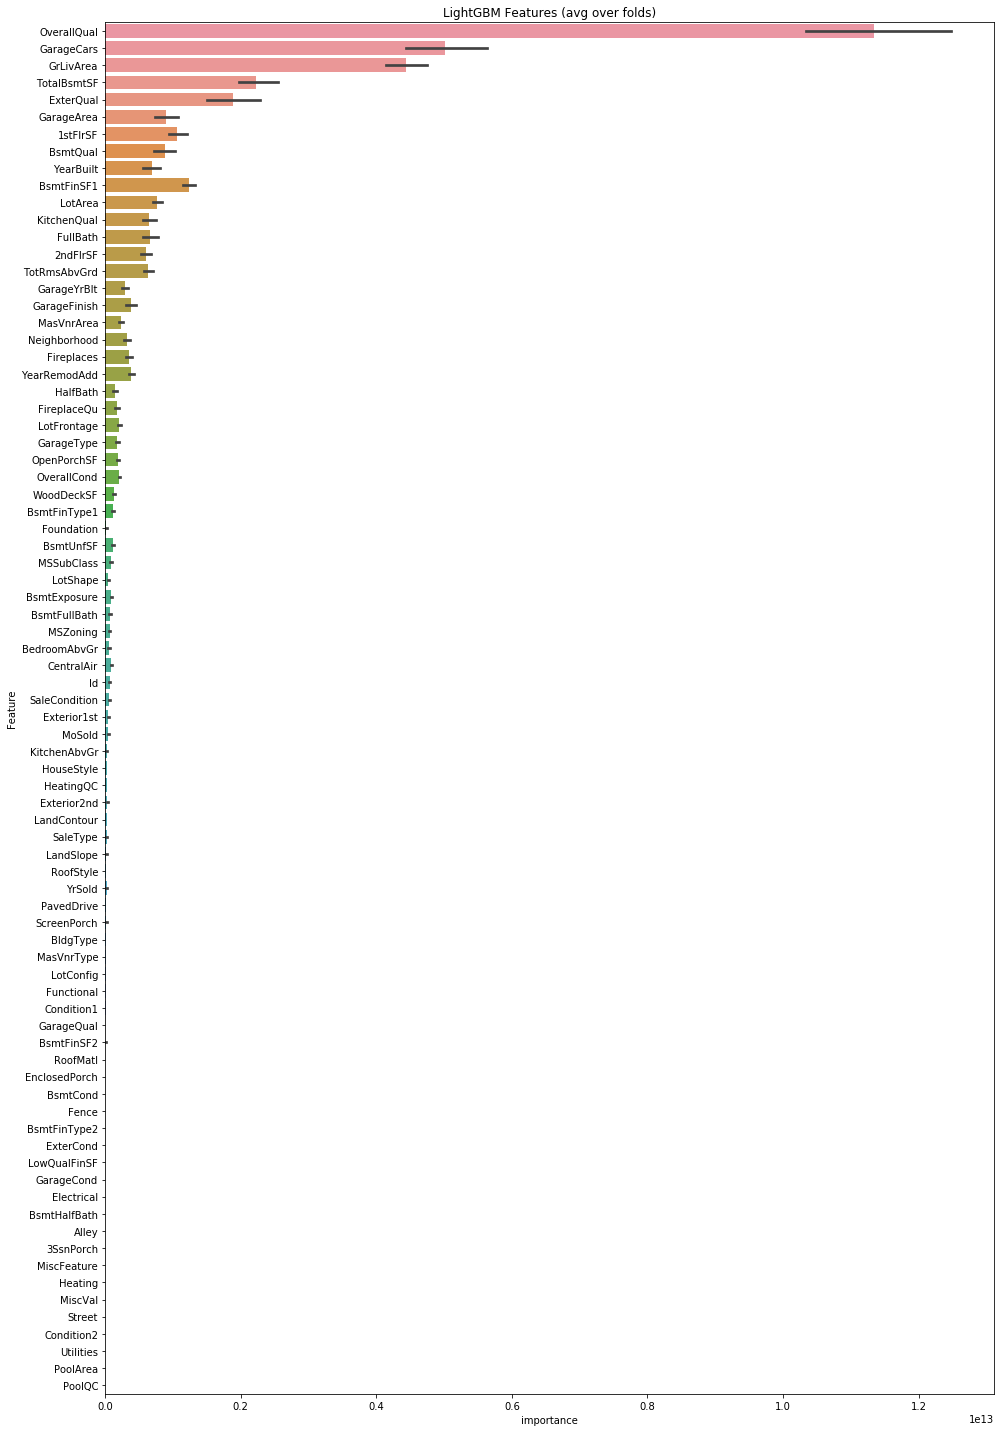

In [164]:
plt.figure(figsize=(14,20))
sns.barplot(x="importance",
            y="Feature",
            data=feature_importance_df_05.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [165]:
param["feature_fraction"] = 0.1

feature_importance_df_01 = pd.DataFrame()

for seed in range(10):
    param["feature_fraction_seed"] = seed
    
    for fold, (idx_tr, idx_te) in enumerate(kf.split(df)):
    
        trn_data = lgb.Dataset(df.iloc[idx_tr][cols], label=df.iloc[idx_tr]["SalePrice"])
        val_data = lgb.Dataset(df.iloc[idx_te][cols], label=df.iloc[idx_te]["SalePrice"])

        num_round = 10000
        clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=-1, early_stopping_rounds = 100)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["Feature"] = cols
        fold_importance_df["importance"] = clf.feature_importance(importance_type = "gain")
        fold_importance_df["seed"] = seed
        fold_importance_df["fold"] = fold + 1
        feature_importance_df_01 = pd.concat([feature_importance_df_01, fold_importance_df], axis=0)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[267]	training's rmse: 7106.33	valid_1's rmse: 21793.7
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	training's rmse: 22719.4	valid_1's rmse: 32005.3
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[221]	training's rmse: 8779.48	valid_1's rmse: 32152.1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[124]	training's rmse: 13423.1	valid_1's rmse: 21762.9
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2025]	training's rmse: 60.4503	valid_1's rmse: 30941.6
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	training's rmse: 14128.4	valid_1's rmse: 22988.9
Training until validation scores don't improve for 100 rounds
Early stopping, best itera

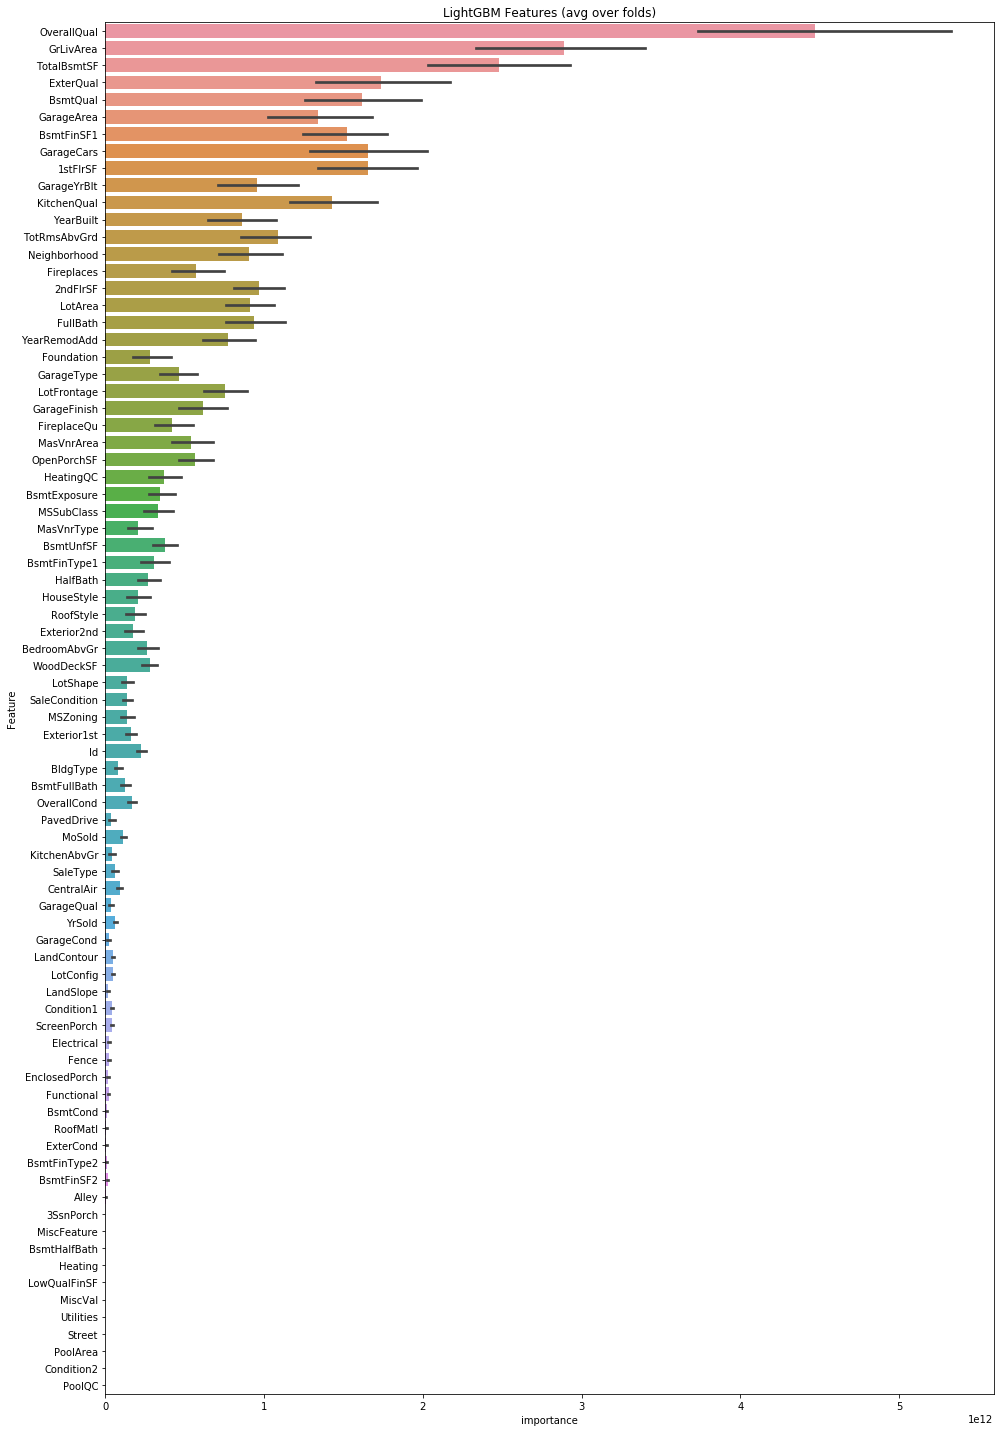

In [166]:
plt.figure(figsize=(14,20))
sns.barplot(x="importance",
            y="Feature",
            data=feature_importance_df_01.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [167]:
feature_importance_df_10["fraction"] = "fraction_1.0"
feature_importance_df_05["fraction"] = "fraction_0.5"
feature_importance_df_01["fraction"] = "fraction_0.1"

In [168]:
df_frac = pd.concat([feature_importance_df_10, feature_importance_df_05, feature_importance_df_01], axis = 0).reset_index()

In [5]:
df_frac.sort_values(by = "fraction", ascending = False).head()

,Feature,importance,seed,fold,fraction
0,Id,33585619200.000,0,1,fraction_1.0
2672,BsmtExposure,85910099552.000,6,4,fraction_1.0
2659,YearBuilt,377226368256.000,6,4,fraction_1.0
2660,YearRemodAdd,337234687808.000,6,4,fraction_1.0
2661,RoofStyle,6854627840.000,6,4,fraction_1.0


In [6]:
df_frac["importance"] = df_frac["importance"].astype(float)

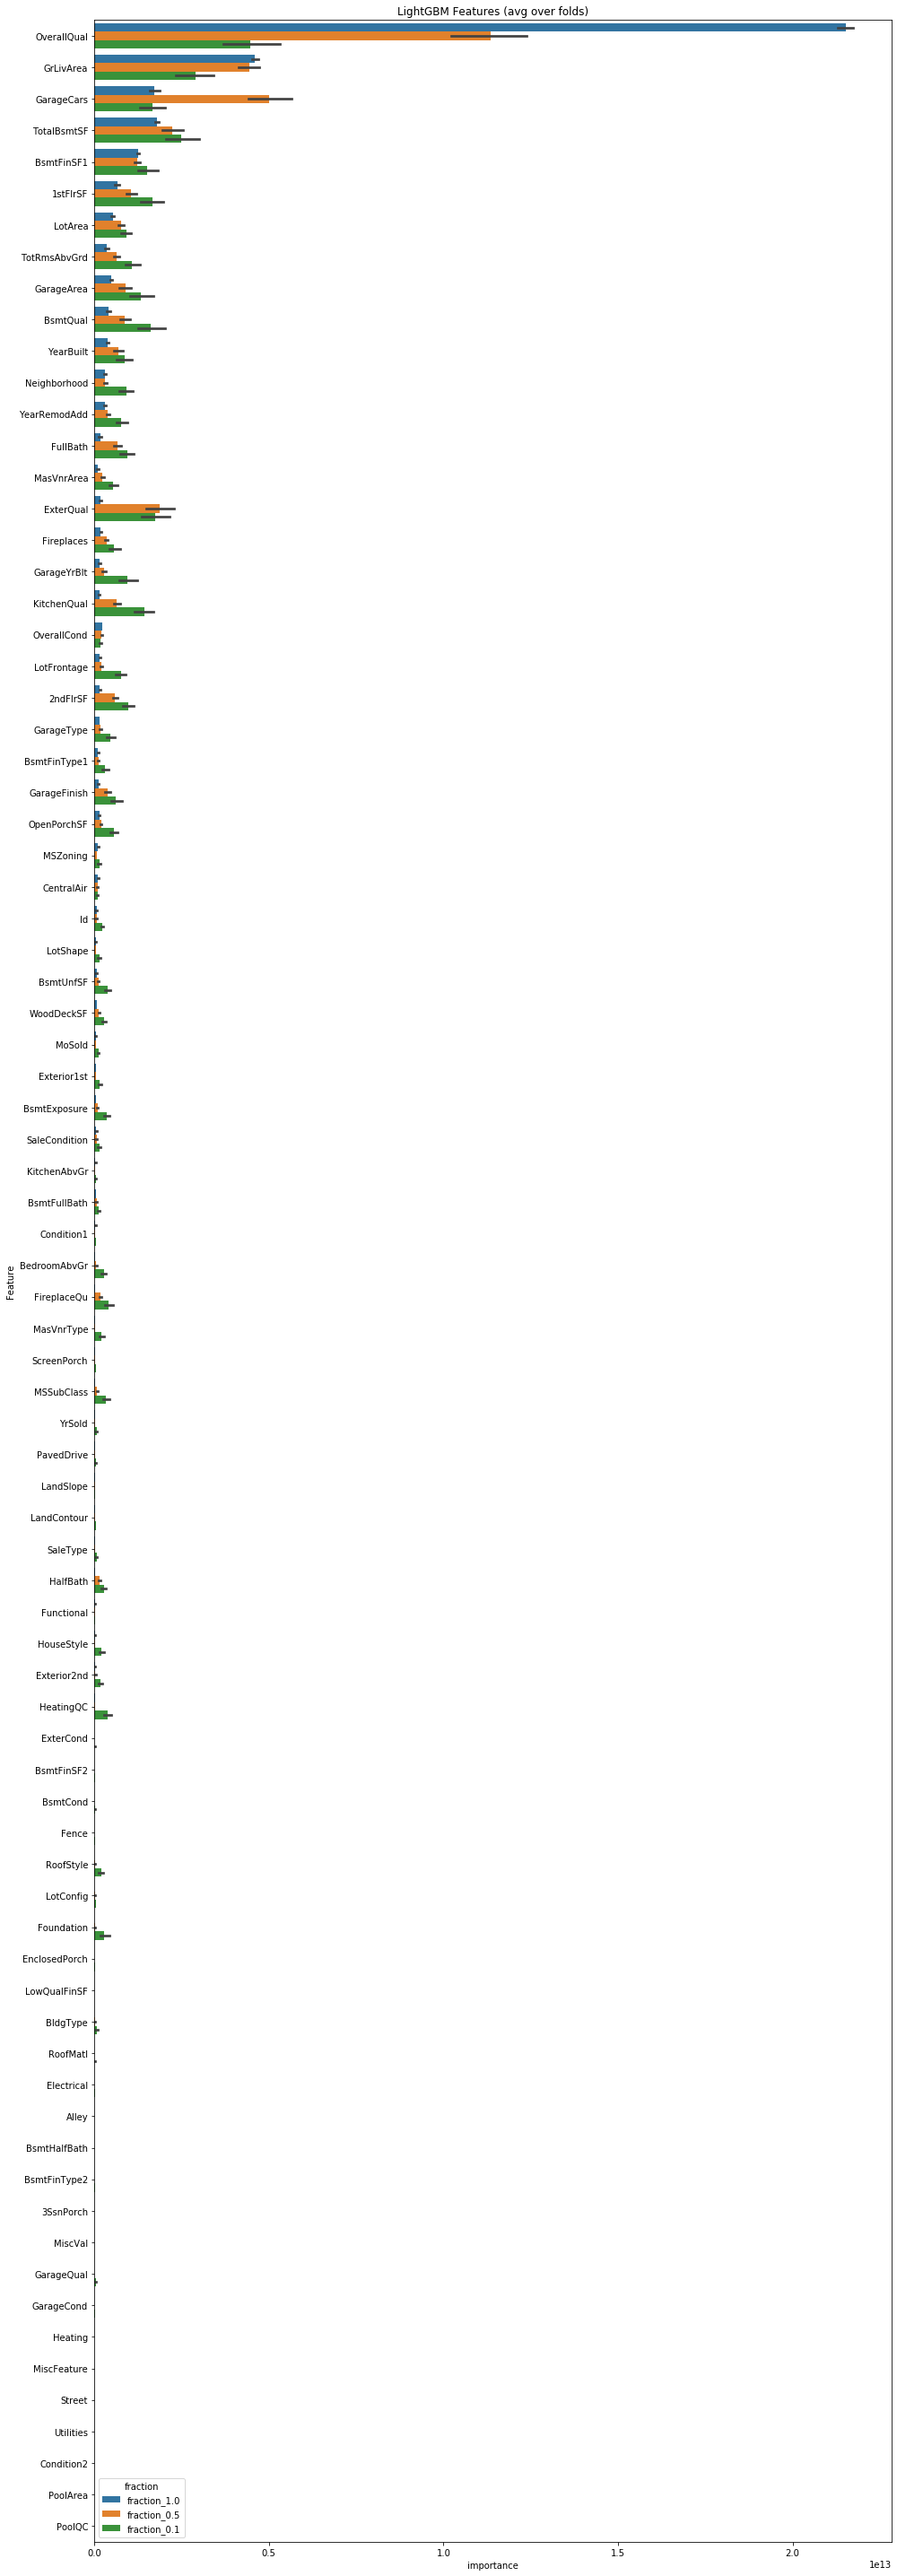

In [69]:
plt.figure(figsize=(14,40))
sns.barplot(x="importance",
            y="Feature",
            hue = "fraction",
            data=df_frac.sort_values(by=["fraction", "importance"],
                                           ascending=[False, False]))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

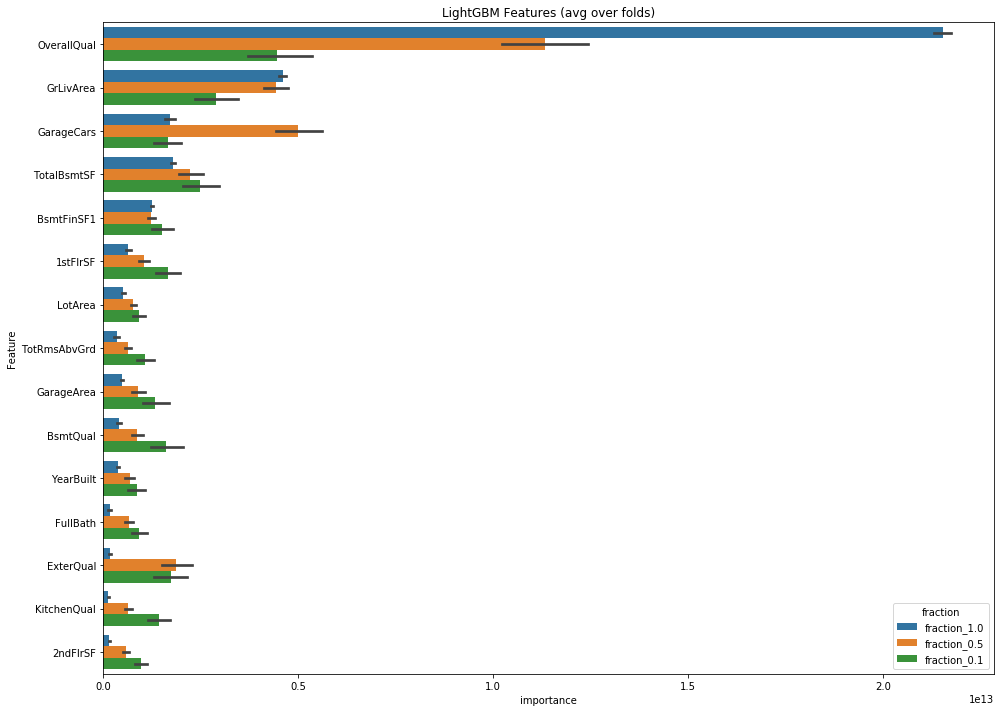

In [66]:
features_high = df_frac.groupby(["Feature"])["importance"].mean().sort_values(ascending = False).head(15).index.tolist()

plt.figure(figsize=(14,10))
sns.barplot(x="importance",
            y="Feature",
            hue = "fraction",
            data=df_frac[df_frac["Feature"].isin(features_high)].sort_values(by=["fraction","importance"],
                                           ascending=[False,False]))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [63]:
features_zero = df_frac.groupby(["fraction","Feature"])["importance"].mean().reset_index()
features_zero = features_zero[features_zero["importance"] == 0]["Feature"].unique().tolist()
df_frac[df_frac["Feature"].isin(features_zero)].groupby(["Feature", "fraction"])["importance"].mean().reset_index()

,Feature,fraction,importance
0,Condition2,fraction_0.1,0.000
1,Condition2,fraction_0.5,0.000
2,Condition2,fraction_1.0,0.000
3,PoolArea,fraction_0.1,0.000
4,PoolArea,fraction_0.5,0.000
5,PoolArea,fraction_1.0,0.000
6,PoolQC,fraction_0.1,0.000
7,PoolQC,fraction_0.5,0.000
8,PoolQC,fraction_1.0,0.000
9,Street,fraction_0.1,0.000


In [10]:
df_frac = df_frac[["Feature","importance","seed","fold","fraction"]]

In [11]:
df_frac["importance"] = df_frac["importance"].astype(float)

In [12]:
df_frac.head()

,Feature,importance,seed,fold,fraction
0,Id,33585619200.000,0,1,fraction_1.0
1,MSSubClass,15159517120.000,0,1,fraction_1.0
2,MSZoning,68039854720.000,0,1,fraction_1.0
3,LotFrontage,92070622528.000,0,1,fraction_1.0
4,LotArea,429568681024.000,0,1,fraction_1.0


In [13]:
df_mean = df_frac.groupby(["Feature","fraction"])["importance"].mean().reset_index()

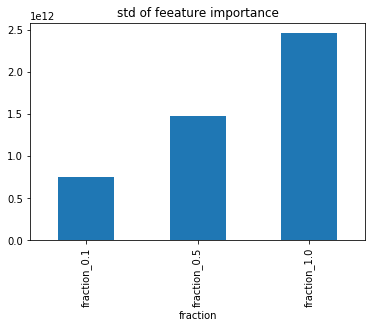

In [14]:
df_mean.groupby(["fraction"])["importance"].std().plot(kind = "bar", title = "std of feeature importance");